# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$ 
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [3]:
import numpy as np

# Define two 3x3 complex matrices
m1 = np.array([[0,0,0,0,0,0], 
               [0,0,0,0,0,0], 
               [0,1,0,0,0,1],
               [0,0,0,1,0,0], 
               [0,0,1,0,0,0], 
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])


print("Input: ", m1,v1)

# Multiplying a 3x3 matrix by a 3x1 vector
state_after_one_click = np.dot(m1, v1)
print("Result after one Click: ", state_after_one_click)

Input:  [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]] [[ 6]
 [ 2]
 [ 1]
 [ 5]
 [ 3]
 [10]]
Result after one Click:  [[ 0]
 [ 0]
 [12]
 [ 5]
 [ 1]
 [ 9]]


![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [4]:
print("Result after two clicks: ", np.dot(m1,state_after_one_click))

Result after two clicks:  [[ 0]
 [ 0]
 [ 9]
 [ 5]
 [12]
 [ 1]]


## Exercises 



### Excercise 1:

1. Write a program to model the behavior of the probabilistic double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)


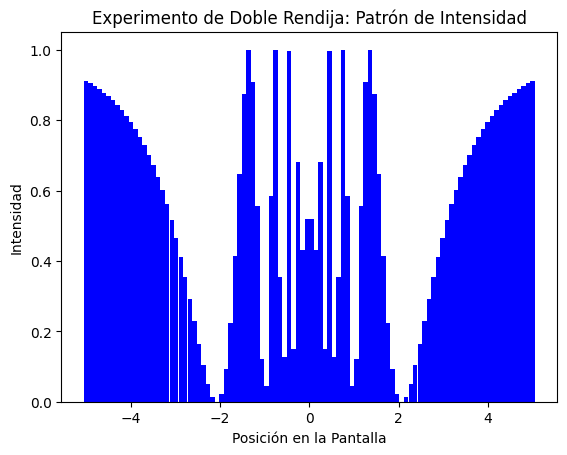

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
num_targets = 100  # Número de puntos en la pantalla
distancia_entre_slits = 0.5  # Distancia entre las rendijas
longitud_onda = 0.1  # Longitud de onda de la luz
distancia_pantalla = 1.0  # Distancia entre las rendijas y la pantalla

# Posiciones en la pantalla (en unidades arbitrarias)
x = np.linspace(-5, 5, num_targets)

# Calcular las diferencias de camino desde las dos rendijas
d1 = np.sqrt((x + distancia_entre_slits / 2) ** 2 + distancia_pantalla ** 2)  # Camino desde la rendija 1
d2 = np.sqrt((x - distancia_entre_slits / 2) ** 2 + distancia_pantalla ** 2)  # Camino desde la rendija 2

# Calcular la diferencia de fase
diferencia_fase = (d2 - d1) * 2 * np.pi / longitud_onda

# La intensidad es proporcional al cuadrado de la suma de las amplitudes de las ondas de ambas rendijas
intensidad = (np.cos(diferencia_fase / 2)) ** 2

# Normalizar la intensidad para una mejor visualización
intensidad /= np.max(intensidad)

# Graficar los resultados
plt.bar(x, intensidad, width=0.1, color='b')
plt.title('Experimento de Doble Rendija: Patrón de Intensidad')
plt.xlabel('Posición en la Pantalla')
plt.ylabel('Intensidad')
plt.show()


### Excercise 2:

1. Write a program to model the behavior of the quantum double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/QuantumSystem.png)

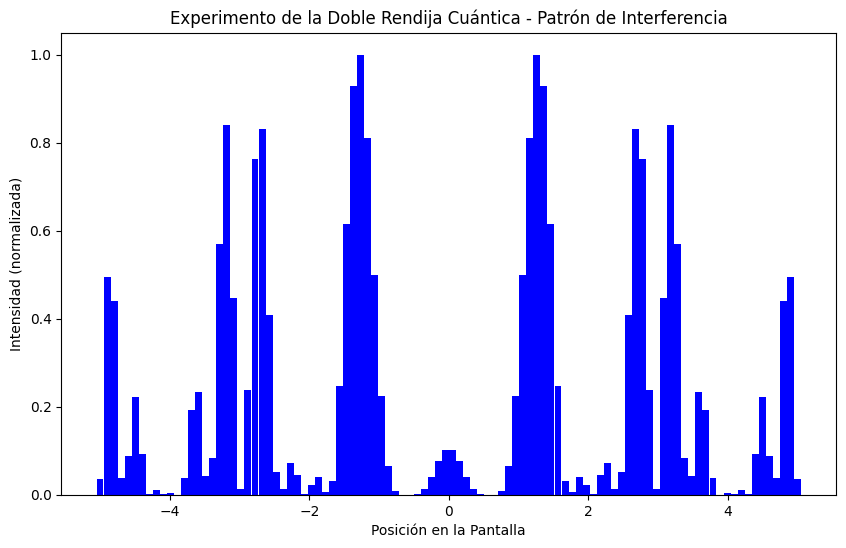

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
longitud_onda = 0.5  # Longitud de onda de la luz (unidades arbitrarias)
distancia_rendijas = 2  # Distancia entre las dos rendijas (unidades arbitrarias)
distancia_pantalla = 5  # Distancia desde las rendijas a la pantalla (unidades arbitrarias)
num_objetivos = 100  # Número de puntos objetivo en la pantalla
ancho_pantalla = 10  # Ancho de la pantalla (unidades arbitrarias)

# Generar posiciones para los puntos objetivo en la pantalla
posiciones_objetivo = np.linspace(-ancho_pantalla / 2, ancho_pantalla / 2, num_objetivos)

# Definir posiciones de las dos rendijas (asumiendo que están centradas en el origen)
rendija1 = -distancia_rendijas / 2
rendija2 = distancia_rendijas / 2

# Función para calcular la distancia desde la rendija al objetivo
def distancia(posicion_rendija, posicion_objetivo):
    return np.sqrt(distancia_pantalla**2 + (posicion_objetivo - posicion_rendija)**2)

# Función para calcular la intensidad de la luz en cada punto objetivo
def intensidad_onda(posicion_objetivo):
    # Calcular distancias desde las rendijas al objetivo
    d1 = distancia(rendija1, posicion_objetivo)
    d2 = distancia(rendija2, posicion_objetivo)
    
    # Calcular diferencias de fase (2*pi*d / longitud de onda)
    fase1 = (2 * np.pi * d1) / longitud_onda
    fase2 = (2 * np.pi * d2) / longitud_onda
    
    # Fórmula de interferencia: suma de dos ondas (interferencia de ondas coseno)
    intensidad = (np.cos(fase1) + np.cos(fase2))**2
    return intensidad

# Calcular intensidades para todas las posiciones objetivo
intensidades = [intensidad_onda(objetivo) for objetivo in posiciones_objetivo]

# Normalizar las intensidades para mejor visualización
intensidades = np.array(intensidades)
intensidades /= np.max(intensidades)

# Graficar los resultados usando un diagrama de barras
plt.figure(figsize=(10, 6))
plt.bar(posiciones_objetivo, intensidades, width=0.1, color='blue')
plt.title('Experimento de la Doble Rendija Cuántica - Patrón de Interferencia')
plt.xlabel('Posición en la Pantalla')
plt.ylabel('Intensidad (normalizada)')
plt.show()


## Exercise 3: Simulating the Double Slit Experiment with Waves

### Objective

In this exercise, you will create a simulation of the double slit experiment using Python. Unlike particle-based interpretations, you will model light as waves and observe the interference pattern that emerges when waves pass through two slits and overlap on a screen. This simulation will help you visualize how constructive and destructive interference patterns form.

### Background

The double slit experiment demonstrates the wave-particle duality of light and
matter. When coherent light passes through two closely spaced slits, it creates
an interference pattern of bright and dark fringes on a detection screen. This
pattern results from the constructive and destructive interference of the waves
emanating from the slits.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Task

Your task is to simulate the wave interference pattern using Python. Assume each slit acts as a point source of waves that spread out in circular patterns. When these waves overlap, they interfere with each other, creating a pattern of alternating high and low intensity on a screen.

### Steps

1. **Setup the Environment**: Ensure you have Python installed with the necessary libraries: NumPy for numerical calculations and Matplotlib for plotting.

2. **Define Parameters**:
   - Define the distance between the slits, the wavelength of the light, the distance from the slits to the screen, and the number of points on the screen where intensity will be calculated.

3. **Model the Waves**:
   - For simplicity, you can assume the wavefronts are straight lines perpendicular to the direction of propagation. Use the Huygens-Fresnel principle to model each slit as a source of new waves.

4. **Calculate Intensity**:
   - Use the principle of superposition to calculate the resultant wave amplitude at each point on the screen by summing the contributions from each slit.
   - The intensity of light at each point is proportional to the square of the amplitude of the resultant wave.

5. **Plot the Results**:
   - Plot the calculated intensity pattern on the screen. You should observe a series of bright and dark fringes, demonstrating the interference pattern.

### Hints

- Use NumPy arrays to efficiently calculate the wave amplitudes and intensities across the screen.
- Remember, the phase difference between the waves from the two slits contributes to the constructive (in-phase) and destructive (out-of-phase) interference.

### Sample Code Skeleton




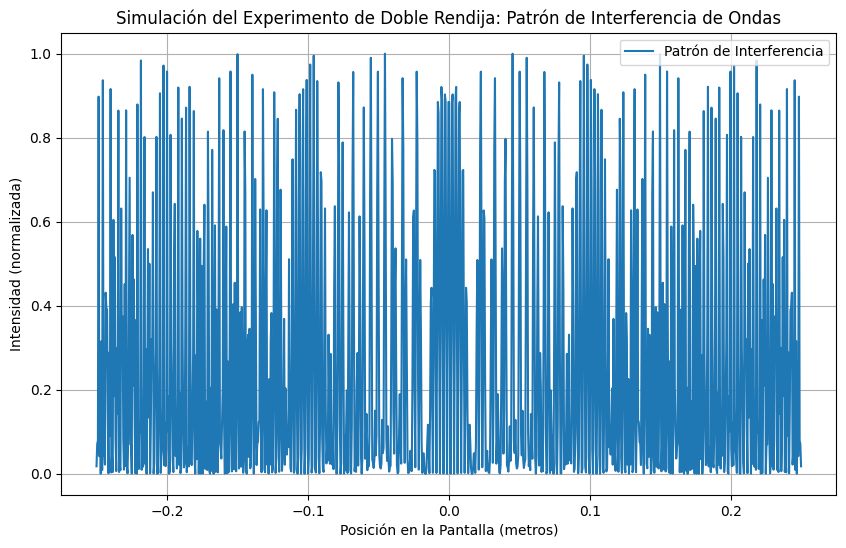

In [9]:

import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
distancia_rendijas = 0.2  # distancia entre las dos rendijas (en metros)
longitud_onda = 0.0005    # longitud de onda de la luz (en metros)
distancia_pantalla = 1.0  # distancia desde las rendijas a la pantalla (en metros)
ancho_pantalla = 0.5      # ancho de la pantalla donde se proyecta la interferencia (en metros)
num_puntos = 1000         # número de puntos en la pantalla donde se calculará la intensidad

# Crear una serie de puntos en la pantalla (posición x en la pantalla)
posiciones_pantalla = np.linspace(-ancho_pantalla / 2, ancho_pantalla / 2, num_puntos)

# Posiciones de las dos rendijas
rendija1 = -distancia_rendijas / 2
rendija2 = distancia_rendijas / 2

# Función para calcular la distancia desde una rendija a un punto en la pantalla
def calcular_distancia(rendija_posicion, pantalla_posicion):
    return np.sqrt(distancia_pantalla**2 + (pantalla_posicion - rendija_posicion)**2)

# Función para calcular la intensidad de luz en un punto de la pantalla
def calcular_intensidad(posicion_pantalla):
    # Distancias desde cada rendija al punto de la pantalla
    d1 = calcular_distancia(rendija1, posicion_pantalla)
    d2 = calcular_distancia(rendija2, posicion_pantalla)
    
    # Diferencias de fase para las ondas (2*pi*d / longitud_onda)
    fase1 = (2 * np.pi * d1) / longitud_onda
    fase2 = (2 * np.pi * d2) / longitud_onda
    
    # Interferencia de ondas: suma de las ondas provenientes de ambas rendijas
    amplitud_total = np.cos(fase1) + np.cos(fase2)
    
    # La intensidad es proporcional al cuadrado de la amplitud total
    intensidad = amplitud_total**2
    return intensidad

# Calcular la intensidad en cada punto de la pantalla
intensidades = np.array([calcular_intensidad(punto) for punto in posiciones_pantalla])

# Normalizar las intensidades para que la mayor sea 1
intensidades /= np.max(intensidades)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(posiciones_pantalla, intensidades, label='Patrón de Interferencia')
plt.xlabel('Posición en la Pantalla (metros)')
plt.ylabel('Intensidad (normalizada)')
plt.title('Simulación del Experimento de Doble Rendija: Patrón de Interferencia de Ondas')
plt.legend()
plt.grid(True)
plt.show()
